# Balança de Corrente

Lucas de Alexandri Dantas Heck

Vinícius dos Passos de Souza


Primeiro vamos importar os dados 

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('Exp-Balan.xlsx',sheet_name='DADOS')

B= data["B(mT)"].values
eB=data["eB(mT)"].values

i=data["i(A)"].values
ei=data["ei(A)"].values

#Massa quando vario corrente
m=data["m1(kg)"].values
m=m*1000
em=data["em1(kg)"].values
em=em*1000
#Massa quando vario campo magnetico
M=data["m2(Kg)"].values
M=M*1000
eM=data["em2(kg)"].values
eM=eM*1000


B2= data["B2(mT)"].values
eB2=data["eB2(mT)"].values

z= data["z(cm)"].values
ez=data["ez(cm)"].values


Primeira análise que devemos fazer é do Campo Magnético em relação a distância z, paralela ao fio.


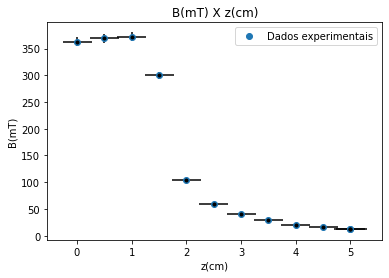

In [2]:
from matplotlib import pyplot as plt

plt.plot(z,B2,'o',label='Dados experimentais')
plt.errorbar(z,B2,yerr=eB2,xerr=ez,fmt='.k')

plt.xlabel('z(cm)')
plt.ylabel('B(mT)')
plt.title('B(mT) X z(cm)')
plt.legend()
plt.savefig('graph-data-BVSz.png')

Podemos agora associar os pontos a uma curva gaussiana e ver quando a área gerada por está é de 95% do valor total. Quando chegar nesse caso, devemos ter uma distância boa o suficiente.

L = 4.5 cm


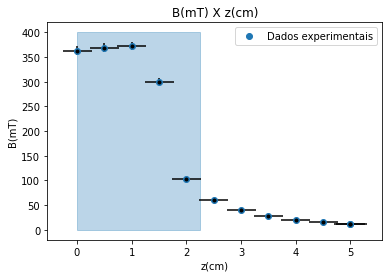

In [16]:
from scipy.optimize import curve_fit
import scipy.integrate as integrate
def gauss(x,A,x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

plt.plot(z,B2,'o',label='Dados experimentais')
plt.errorbar(z,B2,yerr=eB2,xerr=ez,fmt='.k')
popt, pcov = curve_fit(gauss, z, B2)
#integral numérica para achar quando dá 1/e
#plt.plot(z,gauss(z,popt[0],popt[1],popt[2]),':')
# Estimar quando probabilidade de ponto estar no intervalo ser 90%
def integral_approximation(f, a, b):
    return (b-a)*np.mean(f)
b=0
for b in np.linspace(popt[1],2.6,600):
    x_range = np.arange(popt[1],b+0.0001,.0001)
    fx = gauss(x_range,1/(np.sqrt(2*np.pi*popt[2]**2)),popt[1],popt[2])
    # Approximate integral
    approx = integral_approximation(fx,popt[1],b)
    if approx>=0.90/2:
        print(f'L = {round(2*b,1)} cm')
        break

x=np.linspace(0,b,100)
y1 = np.ones(100)*400
y2 = np.ones(100)*0
plt.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)

plt.xlabel('z(cm)')
plt.ylabel('B(mT)')
plt.title('B(mT) X z(cm)')
plt.legend()
plt.savefig('graph-subline-BVSz.png')

# Agora Fixa Campo magnético e varia corrente no cobre

Lembrando a definição padrão da força magnética

$F_m = ILB$, rearrajando termos,

$\implies \boxed{m = \frac{LB}{g}I}$.

Assim ao analisar gráfico de massa VERSUS corrente, conseguimos medir o comprimento do fio.

Fit Parameter: K = -0.524+-0.008
S = 0.01+-0.01


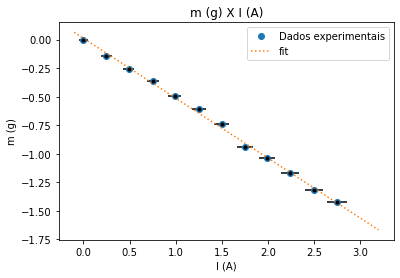

In [17]:
#fornecer qual era a corrente no fio, que era fixa.
B0 = -353
eB0 = B0*2/100-1


plt.plot(i,m,'o',label=f'Dados experimentais')
plt.errorbar(i,m,yerr=em,xerr=ei,fmt='.k')
plt.xlabel('I (A)')
plt.ylabel('m (g)')
plt.title('m (g) X I (A)')
plt.legend()
plt.savefig('graph-data-mVSI.png')
#Agora colocando fit
def curve2(x,A,B):
    return A*x+B

popt, pcov = curve_fit(curve2, i, m)
#para calcular erro
std = np.sqrt(np.diag(pcov))
#mostrar coeficientes obtidos
print(f'Fit Parameter: K = {round(popt[0],3)}+-{round(std[0],3)}')
print(f'S = {round(popt[1],2)}+-{round(std[1],2)}')
#fazer novo gráfico

#plt.plot(i,m,'o',label='Dados experimentais')
#plt.errorbar(i,m,yerr=em,xerr=ei,fmt='.k')
x=np.linspace(-0.1,3.2,100)
plt.plot(x,popt[0]*x+popt[1],':',label='fit')

plt.xlabel('I (A)')
plt.ylabel('m (g)')
plt.title('m (g) X I (A)')
plt.legend()
plt.savefig('graph-fit-mVSI.png')

Se tenho curva do tipo

$m = K I + S$, posso igualar termos e dizer que 

$\implies  \boxed{S = 0}$,

$K = \frac{LB}{g}$, assim caso queira calcular $L$ só preciso reorganizar termos

$\implies \boxed{L = \frac{Kg}{B}}$, por propagação de erro

$\sigma_L= \sqrt{\left( \frac{\sigma_K g}{B} \right )^2 + \left ( \frac{-\sigma_B Kg}{B^2}\right )^2  }$


In [18]:
g = 9.7
L =(popt[0])*g/B0

eL =  np.sqrt( (std[0]*g/B0)**2 + (eB0*popt[0]*g/B0**2)**2)

print(f'L = {round(L*100,2)} +-{round(eL*100,2)} cm')

#print(popt[0]*g/L)

L = 1.44 +-0.04 cm


# NÃO CHEGAMOS NO RESULTADO ESPERADO...
Mas não criemos pânico!!

Fizemos outras medidas e podemos analisa-las para ver se em fato houve um erro na nossa teoria.

# Fixar corrente no cobre e variar campo magnético
Após esse experimento é proposto o experimento de calcular a velocidade de deriva, para isso será usada a equação

$I = nqv_dA$, sendo $A$ a área da secção de fio ($\pi r^2$), $q$ a carga elementar e $n$ a densidade volumétrica , achada online.

Então,podemos definir a força mangética como

$F_m= nqv_dABL$, rearanjando termo

$\implies \boxed{m = \frac{nqv_dAL}{g}B}$.

Ou podemos usar 

$\boxed{m = \frac{IL}{g}B}$

Assim, por meio do gráfico de massa VERSUS Campo mangético é possível obter a largura efetiva do fio com força e talvez a velocidade de deriva.


Fit Parameter: G = 0.0128+-0.0003
D = -0.04+-0.08


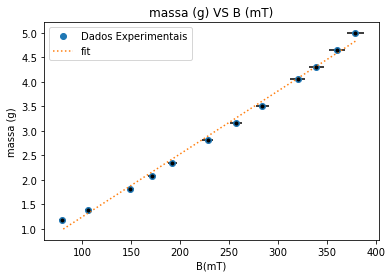

In [20]:
#utilizando o valor de corrente 
I = 3
eI=0.1
q=1.6*10**(-19)

plt.plot(B,M,'o', label = 'Dados Experimentais')

plt.xlabel('B (mT)')
plt.ylabel('massa (kg)')
plt.legend()
plt.title('Massa (g) VS B (mT)')
plt.savefig('graph-mVSB.png')

#Fazendo fit de uma reta
def curve2(x,A,B):
    return A*x+B
popt, pcov = curve_fit(curve2, B,M)
std = np.sqrt(np.diag(pcov))
#mostrar coeficientes obtidos
print(f'Fit Parameter: G = {round(popt[0],4)}+-{round(std[0],4)}')
print(f'D = {round(popt[1],2)}+-{round(std[1],2)}')

plt.errorbar(B,M,yerr=eM,xerr=eB,fmt='.k')
plt.plot(B,popt[0]*B+popt[1],':',label='fit')

plt.xlabel('B(mT)')
plt.ylabel('massa (g)')
plt.title('massa (g) VS B (mT)')
plt.legend()
plt.savefig('graph-fit-mVSB.png')


Comparando os coeficientes calculados, temos que

$G = \frac{nqv_dAL}{g} \implies \boxed{v_d=\frac{Gg}{nqAL}}$
OU $G = \frac{IL}{g} \implies \boxed{ L= \frac{Gg}{I}}$
$D = 0$

Tirando da literatura o valor de n, podemos calcular

In [23]:
#Com G
n =8.4*10**28
d = 0.322/100 #colocar valor depois de medido
ed= 0.0005/200 #colocar valor com base em como foi medido


#primeiro achando L

Lreal = popt[0]*g/I
eLreal = g*np.sqrt((std[0]/I)**2 + (2*popt[0]*eI/I**2)**2)

print(f'L = {round(Lreal*100,1)} +- {round(eLreal*100,1)}cm')

nvd = popt[0]*g/(q*np.pi*(d**2/4)*n*Lreal)
#propagar erro
nevd = np.sqrt((std[0]/(d**2/4))**2 + (popt[0]*ed*2/(d**3/4))**2+(popt[0]*eLreal/((d**2/4)*Lreal**2))**2)*g/(n*q*np.pi)
print(f'velocidade de deriva ={round(nvd,6)} +- {round(nevd,6)} m/s')
#por desencargo

print(f'v_d se usasse só corrente seria {round(I/(n*q*np.pi*(d/2)**2),6)} m/s')


L = 4.2 +- 0.3cm
velocidade de deriva =2.7e-05 +- 2e-06
v_d se usasse só corrente seria 2.7e-05
